(540, 2500) (540,)


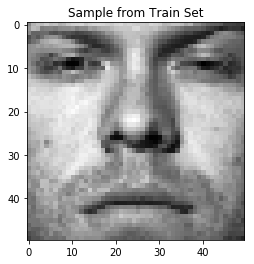

(100, 2500) (100,)


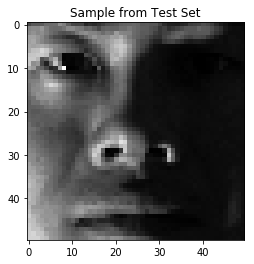

In [1]:
import numpy as np
import imageio
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data = [], []
test_labels, test_data = [], []
for line in open('./faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

for line in open('./faces/test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title("Sample from Train Set")
plt.show()

print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title("Sample from Test Set")
plt.show()


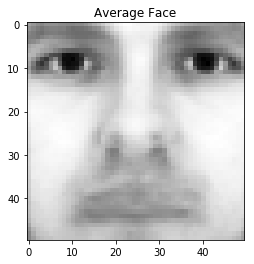

In [2]:
# Display average face
average_face = np.zeros((1, 2500))
for i in range(train_data.shape[1]):
    average_face[0, i] = np.sum(train_data[:, i]) / train_data.shape[0]
plt.imshow(average_face.reshape(50,50), cmap = cm.Greys_r)
plt.title("Average Face")
plt.show()


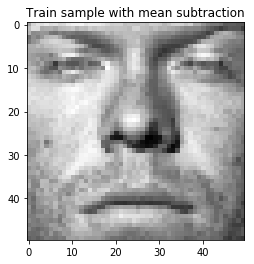

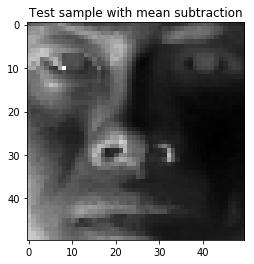

In [4]:
# mean subtraction
train_data_ = train_data - average_face
test_data_ = test_data - average_face
plt.imshow(train_data_[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title("Train sample with mean subtraction")
plt.show()
plt.imshow(test_data_[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title("Test sample with mean subtraction")
plt.show()


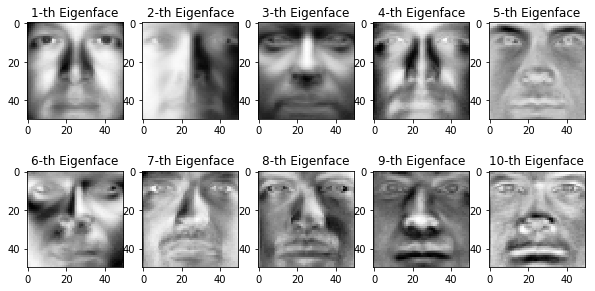

In [5]:
# Eigenface
u, s, v = np.linalg.svd(train_data_)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(v[i,:].reshape(50,50), cmap = cm.Greys_r)
    plt.title('%d-th Eigenface' % (i+1))
plt.show()


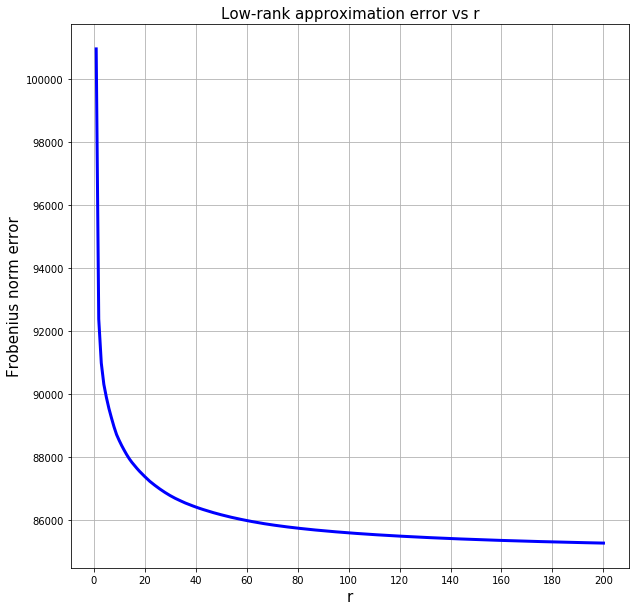

In [6]:
# Low-rank Approximation
def approx_X(r):
    return u[:, :r].dot(np.diag(s[:r]).dot(v[:r, :]))

low_rank_err = []
for i in range(1, 201):
    low_rank_err.append(np.linalg.norm(approx_X(i) - train_data, ord='fro'))

plt.figure(figsize=(10,10))
plt.plot(range(1, 201), low_rank_err, 'b', linewidth=3)
plt.xticks(range(0, 201, 20))
plt.title("Low-rank approximation error vs r", fontsize=15)
plt.xlabel('r', fontsize=15)
plt.ylabel('Frobenius norm error', fontsize=15)
plt.grid()


In [7]:
# Eigenface Feature
def eigenface_feature(v, train, test, r):
    return train.dot(v[:r, :].T), test.dot(v[:r, :].T)



When r = 10, the classification accuracy on the test set is: 0.790000


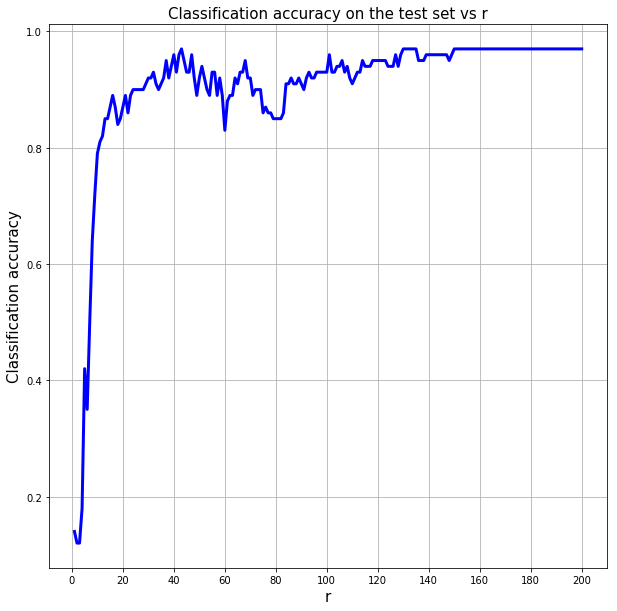

In [8]:
# Face Recognition
from sklearn.linear_model import LogisticRegression
acc = []
for i in range(1, 201):
    train, test = eigenface_feature(v, train_data_, test_data_, i)
    clf = LogisticRegression(random_state=0, multi_class='ovr')
    clf.fit(train, train_labels)
    acc.append(clf.score(test, test_labels))

# Report accuracy when r = 10
print('When r = 10, the classification accuracy on the test set is: %f' % acc[9])

# accuracy plot vs r
plt.figure(figsize=(10,10))
plt.plot(range(1, 201), acc, 'b', linewidth=3)
plt.xticks(range(0, 201, 20))
plt.title("Classification accuracy on the test set vs r", fontsize=15)
plt.xlabel('r', fontsize=15)
plt.ylabel('Classification accuracy', fontsize=15)
plt.grid()

